In [2]:
import pandas as pd

df_Train = pd.read_csv('Valhalla70p.csv')
df_Test = pd.read_csv('Valhalla30p.csv')

# Preguntar al usuario qué DataFrame quiere usar
df_elegido = input("¿Qué DataFrame quieres usar? (df_Train o df_Test): ")

# Asignar el DataFrame elegido a la variable df
if df_elegido == "df_Train":
  df = df_Train
elif df_elegido == "df_Test":
  df = df_Test
else:
  print("Elección inválida. Usando df_Train por defecto.")
  df = df_Train

print("Usando el DataFrame:", df_elegido)

print(df)

¿Qué DataFrame quieres usar? (df_Train o df_Test): df_Train
Usando el DataFrame: df_Train
    Celsius    Valks
0   61.4720 -139.740
1   70.5790 -156.600
2   -7.3013   73.269
3   71.3380 -165.420
4   43.2360  -75.835
..      ...      ...
64  69.0900 -140.640
65  75.9290 -166.940
66  34.7220  -50.735
67  -6.1376   69.075
68  -5.0706   64.106

[69 rows x 2 columns]


In [3]:
# Sacar las tablas de celsius y valks
Celsius = df.iloc[:, 0]
print(Celsius)
Valks = df.iloc[:, 1]
print(Valks)

# Asignar los valores de las thetas
theta0= 1
theta1 = 1
print(theta0, theta1)


# Cargar el valor del learning rate (alpha)
alpha = 0.0005
print(alpha)

0     61.4720
1     70.5790
2     -7.3013
3     71.3380
4     43.2360
       ...   
64    69.0900
65    75.9290
66    34.7220
67    -6.1376
68    -5.0706
Name: Celsius, Length: 69, dtype: float64
0    -139.740
1    -156.600
2      73.269
3    -165.420
4     -75.835
       ...   
64   -140.640
65   -166.940
66    -50.735
67     69.075
68     64.106
Name: Valks, Length: 69, dtype: float64
1 1
0.0005


In [4]:
# Crear función lambda para la función de hipótesis

h0 = lambda theta0, theta1, x : theta0 + theta1 * x

# Calcular el total de muestras a partir de los datos (n)

n = len(df)
print(n)

69


In [5]:
# Calcular delta para theta0 y para cada muestra

delta = [h0(theta0, theta1, Celsius[i]) - Valks[i] for i in range(len(Celsius))]
print(delta)

# Calcular delta para theta1 y para cada muestra
deltax = [delta[i] * Celsius[i] for i in range(len(Celsius)) ]
print(deltax)

# Calcular sumatorias y promedio

sumdelta = sum(delta)
sumdeltax = sum(deltax)
print(sumdelta)
print(sumdeltax)


[202.21200000000002, 228.17899999999997, -79.5703, 237.75799999999998, 120.071, -92.68299999999999, -15.8302, 90.79599999999999, 259.571, 260.949, -65.2117, 250.049, 252.54700000000003, 60.536, 203.518, -71.18140000000001, 36.058, 223.154, 178.21099999999998, 251.86899999999997, 128.131, -118.889, 207.933, 230.719, 154.124, 190.154, 166.263, 23.4059, 126.58, -60.3673, 156.305, -113.868, -17.7557, -112.481, -88.43, 186.076, 142.895, -3.433, 247.67200000000003, -115.299, 40.56, 21.036099999999998, 187.422, 172.27, -54.5887, 70.91, 49.067, 131.628, 146.716, 171.50900000000001, -16.4775, 144.228, 133.617, -63.352799999999995, -81.3472, 72.566, 263.064, 6.2745999999999995, 102.043, -38.7778, 156.217, -25.6885, 80.97, 159.498, 210.73, 243.869, 86.457, -74.21260000000001, -68.1766]
[12430.376064000002, 16104.645640999997, 580.9666313900001, 16961.180203999997, 5191.389756, 949.630018, -124.26390396, 3149.531648, 19662.762821000004, 19959.728061, 276.4128327899999, 19268.525891, 19122.101199, 

In [6]:
# Actualizar theta0
theta0 = theta0 - alpha * sumdelta/n
print(theta0)

# Actualizar theta1
theta1 = theta1 - alpha * sumdeltax/n
print(theta1)

0.9558785050724637
-2.343873685389059


In [7]:

# Hacer 100 Iteraciones

# Crear función lambda para la función de hipótesis
for i in range(100):
  h0 = lambda theta0, theta1, x : theta0 + theta1 * x
  # Calcular el total de muestras a partir de los datos (n)
  n = len(df)
  # Calcular delta para theta0 y para cada muestra
  delta = [h0(theta0, theta1, Celsius[i]) - Valks[i] for i in range(len(Celsius))]

  # Calcular delta para theta1 y para cada muestra
  deltax = [delta[i] * Celsius[i] for i in range(len(Celsius)) ]

  # Calcular sumatorias y promedio

  sumdelta = sum(delta)
  sumdeltax = sum(deltax)

  # Actualizar theta0
  theta0 = theta0 - alpha * sumdelta/n

  # Actualizar theta1
  theta1 = theta1 - alpha * sumdeltax/n


In [8]:
# Sacar los valores estimados
Celsius2 = Celsius
Valks2Estimado = h0(theta0, theta1, Celsius)
print(Valks2Estimado)
print(theta0, theta1)

# Funcion de costo
Costo = sum((Valks2Estimado - Valks)**2)/(2*n)
print(Costo)


0    -131.754865
1    -151.571779
2      17.896449
3    -153.223369
4     -92.073167
         ...    
64   -148.331701
65   -163.213426
66    -73.546627
67     15.364227
68     13.042426
Name: Celsius, Length: 69, dtype: float64
2.0087547904536716 -2.1760089192155965
518.9862054503719


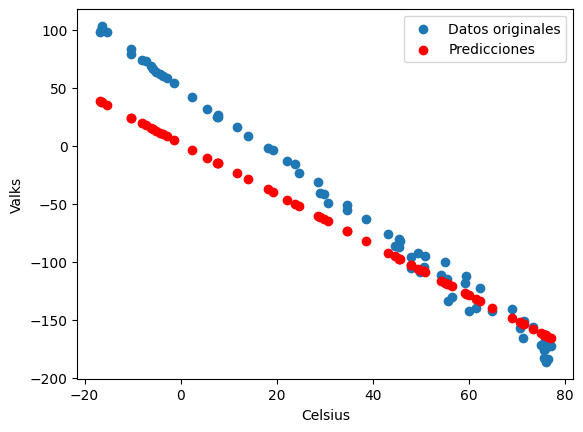

In [9]:
import matplotlib.pyplot as plt

# Graficar datos originales
plt.scatter(Celsius, Valks, label='Datos originales')

# Graficar datos predichos (usando el nombre de la variable que ya tienes)
plt.scatter(Celsius2, Valks2Estimado, color='red', label='Predicciones')

# Etiquetas y leyenda
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()

# Mostrar gráfica
plt.show()





In [10]:
# Codigo para pasar el notebook a html
import os
from google.colab import drive
drive.mount('/content/drive')
# Listar archivos en el directorio MyDrive/Tarea
os.listdir('/content/drive/MyDrive/Tarea')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Challenge.html', 'Challenge.ipynb']

In [11]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Tarea/Challenge.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Tarea/Challenge.ipynb to html
[NbConvertApp] Writing 593198 bytes to /content/drive/MyDrive/Tarea/Challenge.html
